In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [33]:
Original_data = pd.read_csv("Resources/cscpopendata.csv")
Original_data.head(50)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
7,7,ABSOLUTE Precision Color Powder System - All S...,311.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
8,7,ABSOLUTE Precision Color Powder System - All S...,312.0,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
9,8,ABSOLUTE Precision Color Powder System Opaque ...,313.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,...,13463-67-7,17903,Titanium dioxide,07/13/2009,12/30/2010,NaN,06/09/2010,06/09/2010,NaN,1


In [34]:
#minimizing the data frame
original_df = Original_data[["ProductName", "CSF", "CompanyName", "BrandName", "PrimaryCategory",
                             "CasNumber", "ChemicalId", "ChemicalName", "InitialDateReported", "MostRecentDateReported",
                             "DiscontinuedDate", "ChemicalCreatedAt", "ChemicalUpdatedAt", "ChemicalDateRemoved", "ChemicalCount"]]
original_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [35]:
original_df.shape

(114635, 15)

In [36]:
original_new_df = original_df.drop_duplicates()
original_new_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [37]:
original_new_df.shape

(108477, 15)

In [38]:
print(original_new_df.dtypes)

ProductName               object
CSF                       object
CompanyName               object
BrandName                 object
PrimaryCategory           object
CasNumber                 object
ChemicalId                 int64
ChemicalName              object
InitialDateReported       object
MostRecentDateReported    object
DiscontinuedDate          object
ChemicalCreatedAt         object
ChemicalUpdatedAt         object
ChemicalDateRemoved       object
ChemicalCount              int64
dtype: object


In [39]:
original_new_df['InitialDateReported'] = pd.to_datetime(original_new_df['InitialDateReported'])
original_new_df['MostRecentDateReported'] = pd.to_datetime(original_new_df['MostRecentDateReported'])
original_new_df['DiscontinuedDate'] = pd.to_datetime(original_new_df['DiscontinuedDate'])
original_new_df['ChemicalCreatedAt'] = pd.to_datetime(original_new_df['ChemicalCreatedAt'])
original_new_df['ChemicalUpdatedAt'] = pd.to_datetime(original_new_df['ChemicalUpdatedAt'])
original_new_df['ChemicalDateRemoved'] = pd.to_datetime(original_new_df['ChemicalDateRemoved'])
original_new_df.dtypes

ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategory                   object
CasNumber                         object
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
dtype: object

In [40]:
original_new_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


In [41]:
#couting the chemicals 
original_new_df["ChemicalName"].value_counts()

ChemicalName
Titanium dioxide                                                                                       88890
Silica, crystalline (airborne particles of respirable size)                                             2652
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2092
Butylated hydroxyanisole                                                                                1805
Mica                                                                                                    1789
                                                                                                       ...  
Sodium Bromate                                                                                             1
Cocamide                                                                                                   1
Diethanolamides of the fatty acids of coconut oil                                                          1
Distil

In [42]:
original_new_df["ChemicalCount"].describe()

count    108477.000000
mean          1.284318
std           0.633407
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: ChemicalCount, dtype: float64

In [43]:
len(original_new_df["ProductName"])

108477

## plotting


In [44]:
data_visualiation = original_new_df.groupby(["CompanyName", "ChemicalName"])["ChemicalName"].count().reset_index(name="ChemicalCount")
# data_visualiation.columns = ['CompanyName', 'ChemicalCount']
# data_visualiation['ChemicalName'] = original_new_df["ChemicalName"]
# data_visualiation["BrandName"] = original_new_df["BrandName"]
data_visualiation

,CompanyName,ChemicalName,ChemicalCount
0,2355644 Ontario Inc.,Titanium dioxide,1
1,"A. P. Deauville, LLC",Estragole,1
2,ACQUA DI PARMA,Cocamide MEA,6
3,ACQUA DI PARMA,Titanium dioxide,9
4,ACQUA DI PARMA,Triethanolamine,4
...,...,...,...
1590,"salerm cosm�tica profesional,Inc.",Cocamide diethanolamine,21
1591,"salerm cosm�tica profesional,Inc.",Phenacetin,17
1592,theBalm,"Retinol/retinyl esters, when in daily dosages ...",17
1593,theBalm,Talc,10


In [45]:
sorted_df = data_visualiation.sort_values(by='ChemicalCount', ascending=False)
sorted_df.head(20)

,CompanyName,ChemicalName,ChemicalCount
728,L'Oreal USA,Titanium dioxide,5679
1218,Revlon Consumer Product Corporation,Titanium dioxide,4035
344,Coty,Titanium dioxide,3652
1258,S+,Titanium dioxide,3496
153,"Bare Escentuals Beauty, Inc.",Titanium dioxide,3424
1404,The Procter & Gamble Company,Titanium dioxide,3304
1368,Tarte Cosmetics,Titanium dioxide,2123
953,"NYX Los Angeles, Inc.",Titanium dioxide,2013
969,Nars Cosmetics,Titanium dioxide,1979
1378,The Boots Company PLC,Titanium dioxide,1899


In [46]:
companies_over_1066 = sorted_df[sorted_df['ChemicalCount'] >= 1272]
companies_over_1066.head(50)

,CompanyName,ChemicalName,ChemicalCount
728,L'Oreal USA,Titanium dioxide,5679
1218,Revlon Consumer Product Corporation,Titanium dioxide,4035
344,Coty,Titanium dioxide,3652
1258,S+,Titanium dioxide,3496
153,"Bare Escentuals Beauty, Inc.",Titanium dioxide,3424
1404,The Procter & Gamble Company,Titanium dioxide,3304
1368,Tarte Cosmetics,Titanium dioxide,2123
953,"NYX Los Angeles, Inc.",Titanium dioxide,2013
969,Nars Cosmetics,Titanium dioxide,1979
1378,The Boots Company PLC,Titanium dioxide,1899


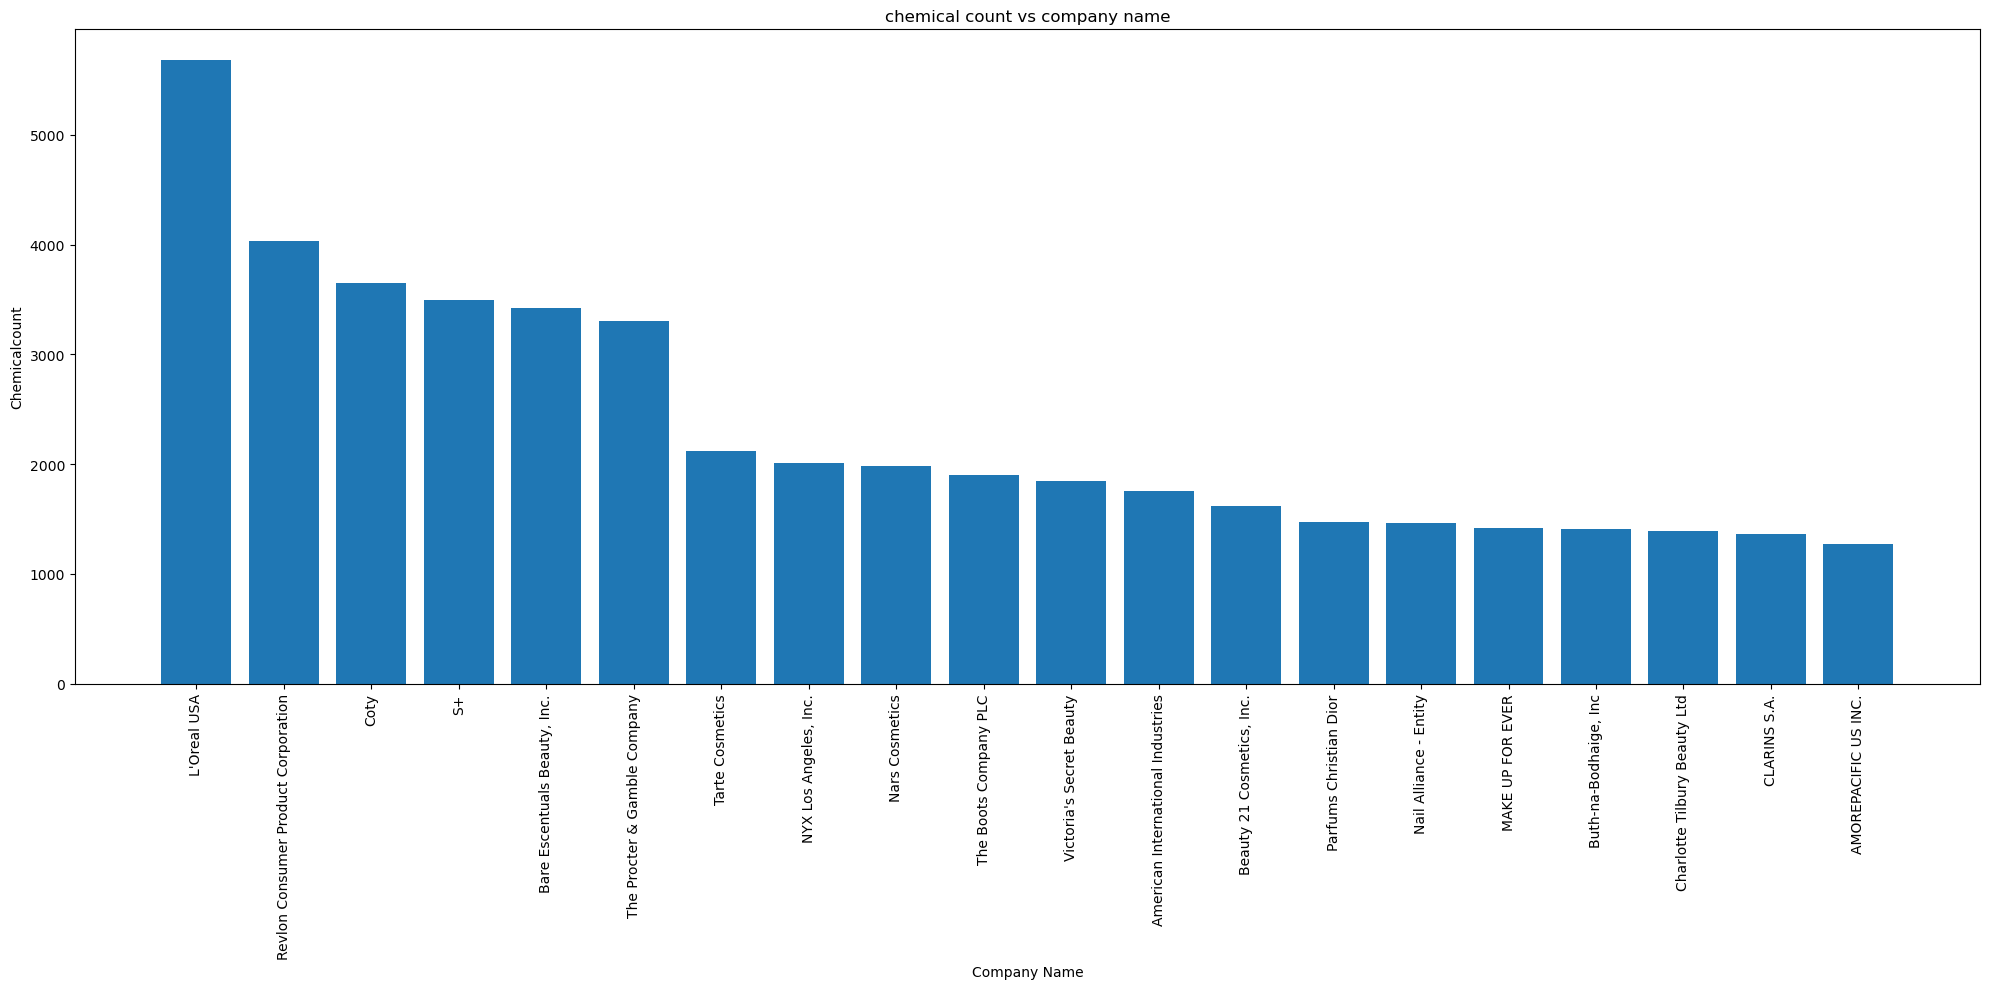

In [47]:
plt.figure(figsize=(20,10))

plt.bar(companies_over_1066["CompanyName"], companies_over_1066["ChemicalCount"])

plt.xlabel('Company Name')
plt.ylabel('Chemicalcount')
plt.title('chemical count vs company name')
# plt.xlim(-0.25, len(companies_over_1035))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("MA graphs\MA_graphs.png")
plt.show()

In [48]:
print(companies_over_1066["ChemicalName"].isnull().sum())
# companies_over_1035["ChemicalName"] = companies_over_1035["ChemicalName"].astype(str)
# companies_over_1035 = companies_over_1035.dropna(subset=["ChemicalName"])

0


In [49]:
data_visualiation_for_brand_name = original_new_df.groupby(["BrandName", "ChemicalName"])["ChemicalName"].count().reset_index(name="ChemicalCount")
data_visualiation_for_brand_name

,BrandName,ChemicalName,ChemicalCount
0,Anastasia Beverly HIlls,Titanium dioxide,1
1,Entity Nudite,Titanium dioxide,1
2,Gap Outlet,Titanium dioxide,1
3,Hard Candy,Titanium dioxide,20
4,Innisfree,Titanium dioxide,1
...,...,...,...
4280,text,Acetaldehyde,1
4281,theBalm,"Retinol/retinyl esters, when in daily dosages ...",17
4282,theBalm,Talc,10
4283,theBalm,Titanium dioxide,90


In [50]:
data_visualiation_for_brand_name = data_visualiation_for_brand_name.sort_values(by="ChemicalCount", ascending=False)
data_visualiation_for_brand_name.head(20)

,BrandName,ChemicalName,ChemicalCount
4180,bareMinerals,Titanium dioxide,2793
3134,Revlon,Titanium dioxide,2241
3220,SEPHORA,Titanium dioxide,2141
2577,NYX,Titanium dioxide,2013
2544,NARS,Titanium dioxide,1974
4277,tarte,Titanium dioxide,1841
3999,Victoria's Secret Beauty,Titanium dioxide,1741
1061,CoverGirl,Titanium dioxide,1615
2678,No7,Titanium dioxide,1574
2860,Parfums Christian Dior,Titanium dioxide,1445


In [51]:
companies_over_1066 = data_visualiation_for_brand_name[data_visualiation_for_brand_name["ChemicalCount"] >= 1066]
companies_over_1066

,BrandName,ChemicalName,ChemicalCount
4180,bareMinerals,Titanium dioxide,2793
3134,Revlon,Titanium dioxide,2241
3220,SEPHORA,Titanium dioxide,2141
2577,NYX,Titanium dioxide,2013
2544,NARS,Titanium dioxide,1974
4277,tarte,Titanium dioxide,1841
3999,Victoria's Secret Beauty,Titanium dioxide,1741
1061,CoverGirl,Titanium dioxide,1615
2678,No7,Titanium dioxide,1574
2860,Parfums Christian Dior,Titanium dioxide,1445


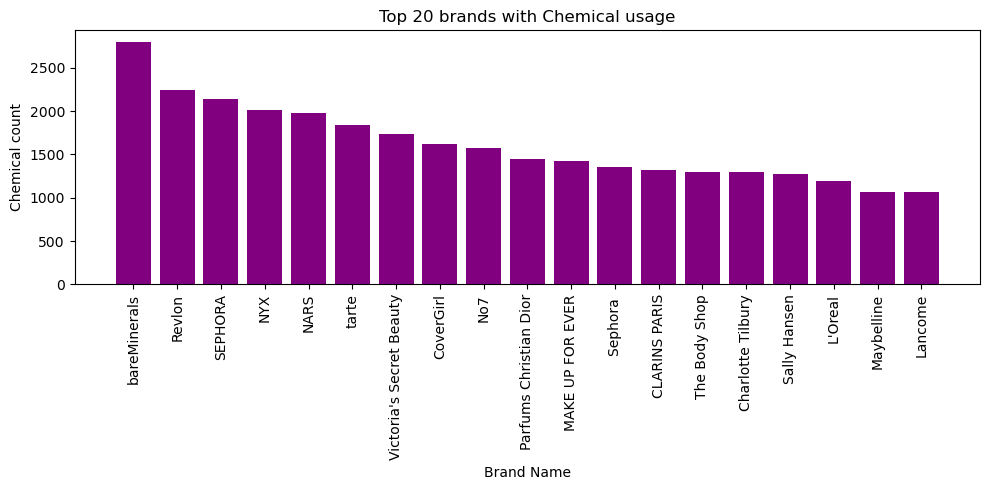

In [52]:
# Bar chart that explains the amount of chemical usages per the 31st companies that were mentioned the most. 
plt.figure(figsize=(10,5))

top_companies = plt.bar(companies_over_1066["BrandName"], companies_over_1066["ChemicalCount"], color="purple")
# top_chemicals, = plt.bar(chemicals_over_71["ChemicalName"], chemicals_over_71["Count"])

plt.xlabel('Brand Name')
plt.ylabel('Chemical count')
plt.title('Top 20 brands with Chemical usage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("MA graphs\MA_graphs1.png")

plt.show()

## Plotting without Titanuim Dioxide

In [53]:
data_visualiation_without_titanuim = original_new_df.groupby(["CompanyName", "ChemicalName"])["ChemicalName"].count().reset_index(name="ChemicalCount")
data_visualiation_without_titanuim.head()

,CompanyName,ChemicalName,ChemicalCount
0,2355644 Ontario Inc.,Titanium dioxide,1
1,"A. P. Deauville, LLC",Estragole,1
2,ACQUA DI PARMA,Cocamide MEA,6
3,ACQUA DI PARMA,Titanium dioxide,9
4,ACQUA DI PARMA,Triethanolamine,4


In [54]:
rmv_titanuim = data_visualiation_without_titanuim.loc[data_visualiation_without_titanuim["ChemicalName"] != "Titanium dioxide"]
rmv_titanuim.head()

,CompanyName,ChemicalName,ChemicalCount
1,"A. P. Deauville, LLC",Estragole,1
2,ACQUA DI PARMA,Cocamide MEA,6
4,ACQUA DI PARMA,Triethanolamine,4
5,AFFLINK,Cocamide diethanolamine,7
7,AG PROFESSIONAL HAIR CARE PRODUCTS LTD,Cocamide diethanolamine,4


In [55]:
rmv_titanuim = rmv_titanuim.sort_values(by="ChemicalCount", ascending=False)
rmv_titanuim.head(25)

,CompanyName,ChemicalName,ChemicalCount
951,"NYX Los Angeles, Inc.",Butylated hydroxyanisole,1075
283,Charlotte Tilbury Beauty Ltd,"Silica, crystalline (airborne particles of res...",987
341,Coty,"Retinol/retinyl esters, when in daily dosages ...",776
955,Nail Alliance - Entity,"Silica, crystalline (airborne particles of res...",568
1255,S+,Mica,510
1555,ZOEVA GmbH,Talc,370
746,LI Pigments,Carbon black,345
1257,S+,Talc,336
1495,Victoria's Secret Beauty,"Retinol/retinyl esters, when in daily dosages ...",327
154,Bath & Body Works,"Retinol/retinyl esters, when in daily dosages ...",318


In [56]:
rmv_titanuim = rmv_titanuim[rmv_titanuim['ChemicalCount'] >= 125 ]
rmv_titanuim

,CompanyName,ChemicalName,ChemicalCount
951,"NYX Los Angeles, Inc.",Butylated hydroxyanisole,1075
283,Charlotte Tilbury Beauty Ltd,"Silica, crystalline (airborne particles of res...",987
341,Coty,"Retinol/retinyl esters, when in daily dosages ...",776
955,Nail Alliance - Entity,"Silica, crystalline (airborne particles of res...",568
1255,S+,Mica,510
1555,ZOEVA GmbH,Talc,370
746,LI Pigments,Carbon black,345
1257,S+,Talc,336
1495,Victoria's Secret Beauty,"Retinol/retinyl esters, when in daily dosages ...",327
154,Bath & Body Works,"Retinol/retinyl esters, when in daily dosages ...",318


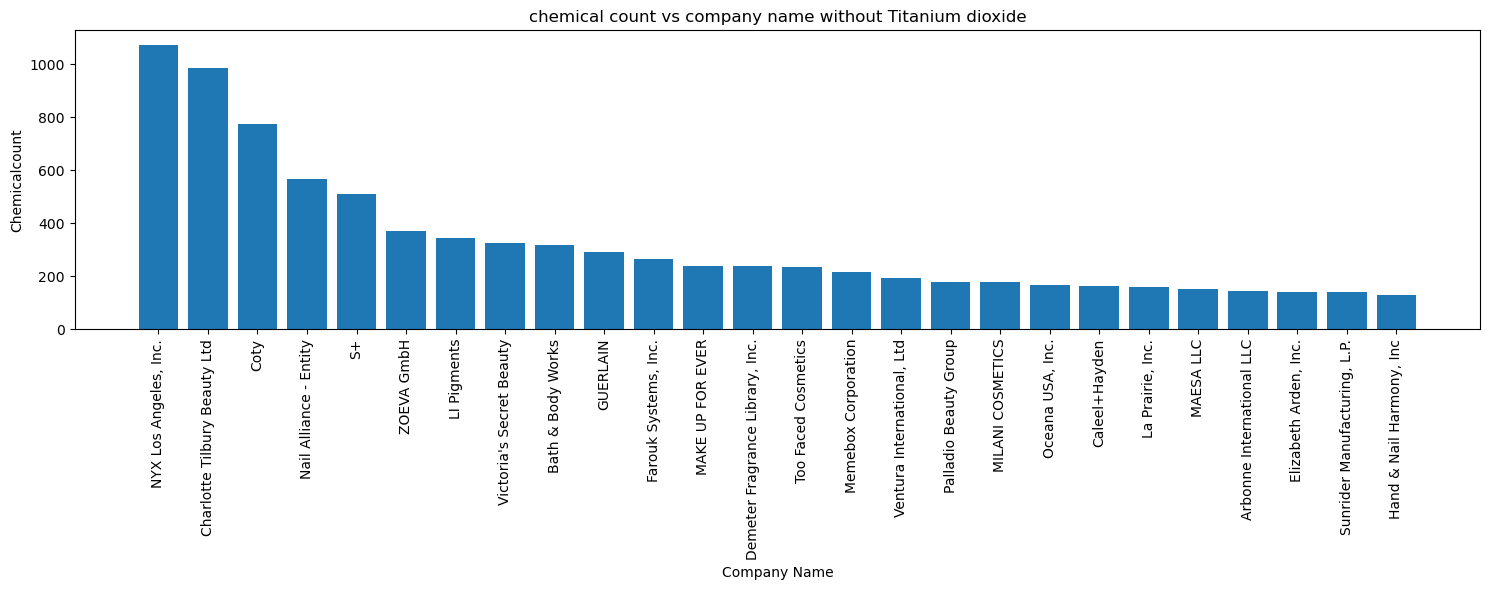

In [57]:
plt.figure(figsize=(15,6))

plt.bar(rmv_titanuim["CompanyName"], rmv_titanuim["ChemicalCount"])

plt.xlabel('Company Name')
plt.ylabel('Chemicalcount')
plt.title('chemical count vs company name without Titanium dioxide')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("MA graphs\MA_graphs2.png")

plt.show()

## Plotting based on Titanuim Dioxide

In [58]:
#filtering data based on the most used chemical which is Titanium Dioxide.
Titanium = Original_data.loc[Original_data["ChemicalName"]=="Titanium dioxide"]
Titanium.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1


In [59]:
Titanium.shape

(93480, 22)

In [60]:
groupby_data = Titanium.groupby(["CompanyName", "ChemicalName"])["ChemicalName"].count().reset_index(name="ChemicalCount")
groupby_data

,CompanyName,ChemicalName,ChemicalCount
0,2355644 Ontario Inc.,Titanium dioxide,1
1,ACQUA DI PARMA,Titanium dioxide,9
2,AFFLINK,Titanium dioxide,1
3,"ALBION COSMETICS (America), Inc.",Titanium dioxide,4
4,ALPHAEON Corporation,Titanium dioxide,4
...,...,...,...
451,"eos Products, LLC",Titanium dioxide,12
452,label.m USA INC,Titanium dioxide,4
453,laboratoire Sintyl SA,Titanium dioxide,12
454,purminerals,Titanium dioxide,192


In [61]:
groupby_data.shape

(456, 3)

In [62]:
loreal = groupby_data.loc[groupby_data["CompanyName"] == "L'Oreal USA"]
loreal

,CompanyName,ChemicalName,ChemicalCount
215,L'Oreal USA,Titanium dioxide,5743


In [63]:
grouped_and_sorted = groupby_data.sort_values(by="ChemicalCount", ascending=False)
grouped_and_sorted.head(30)

,CompanyName,ChemicalName,ChemicalCount
215,L'Oreal USA,Titanium dioxide,5743
344,Revlon Consumer Product Corporation,Titanium dioxide,4226
352,S+,Titanium dioxide,3990
102,Coty,Titanium dioxide,3792
44,"Bare Escentuals Beauty, Inc.",Titanium dioxide,3782
400,The Procter & Gamble Company,Titanium dioxide,3455
388,Tarte Cosmetics,Titanium dioxide,2403
279,Nars Cosmetics,Titanium dioxide,2055
274,"NYX Los Angeles, Inc.",Titanium dioxide,2031
391,The Boots Company PLC,Titanium dioxide,1956


In [64]:
grouped_and_sorted = grouped_and_sorted[grouped_and_sorted["ChemicalCount"] >= 791]
grouped_and_sorted

,CompanyName,ChemicalName,ChemicalCount
215,L'Oreal USA,Titanium dioxide,5743
344,Revlon Consumer Product Corporation,Titanium dioxide,4226
352,S+,Titanium dioxide,3990
102,Coty,Titanium dioxide,3792
44,"Bare Escentuals Beauty, Inc.",Titanium dioxide,3782
400,The Procter & Gamble Company,Titanium dioxide,3455
388,Tarte Cosmetics,Titanium dioxide,2403
279,Nars Cosmetics,Titanium dioxide,2055
274,"NYX Los Angeles, Inc.",Titanium dioxide,2031
391,The Boots Company PLC,Titanium dioxide,1956


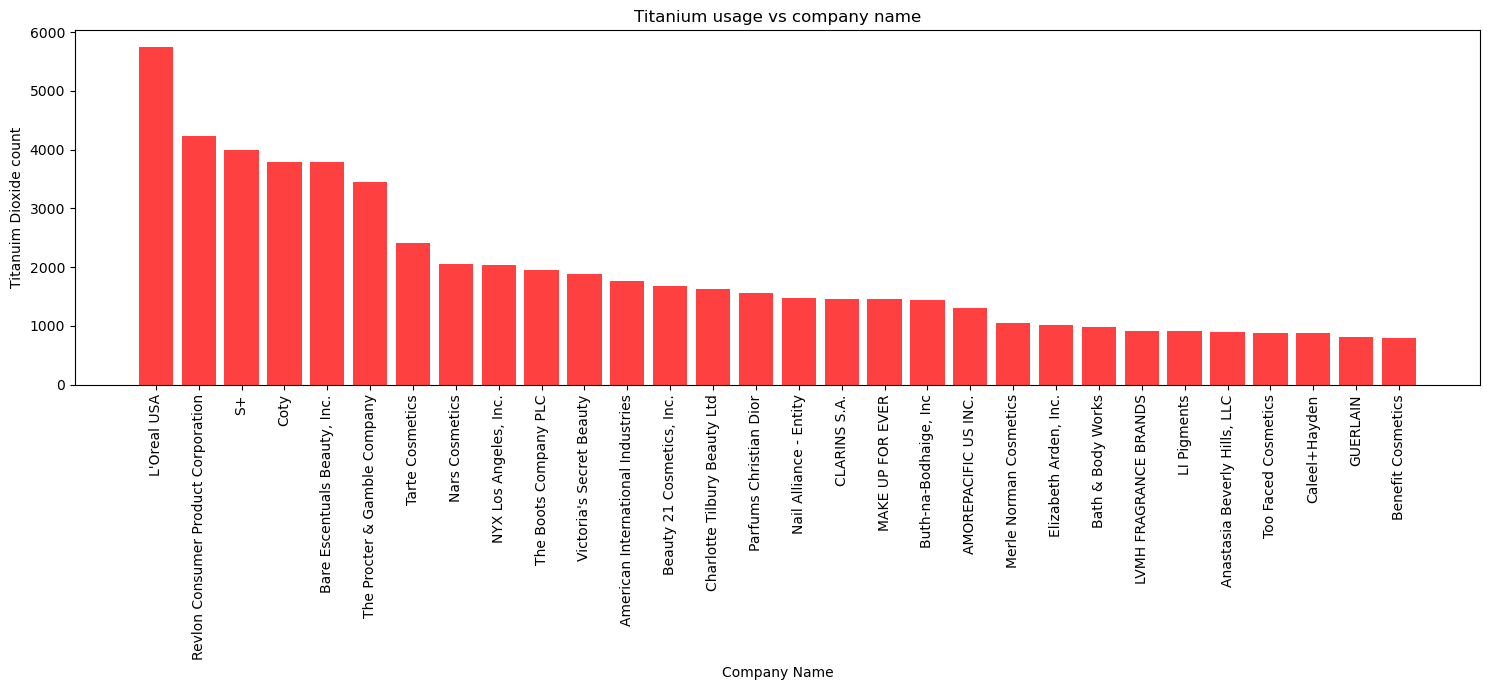

In [65]:
plt.figure(figsize=(15,7))

plt.bar(grouped_and_sorted["CompanyName"],grouped_and_sorted["ChemicalCount"], color="red", alpha=0.75)


plt.xlabel('Company Name')
plt.ylabel('Titanuim Dioxide count')
plt.title('Titanium usage vs company name')
# plt.xlim(-0.25, len(top_companies))
# plt.xlim(0, len(groupby_data["CompanyName"])+10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("MA graphs\MA_graphs3.png")
plt.show()

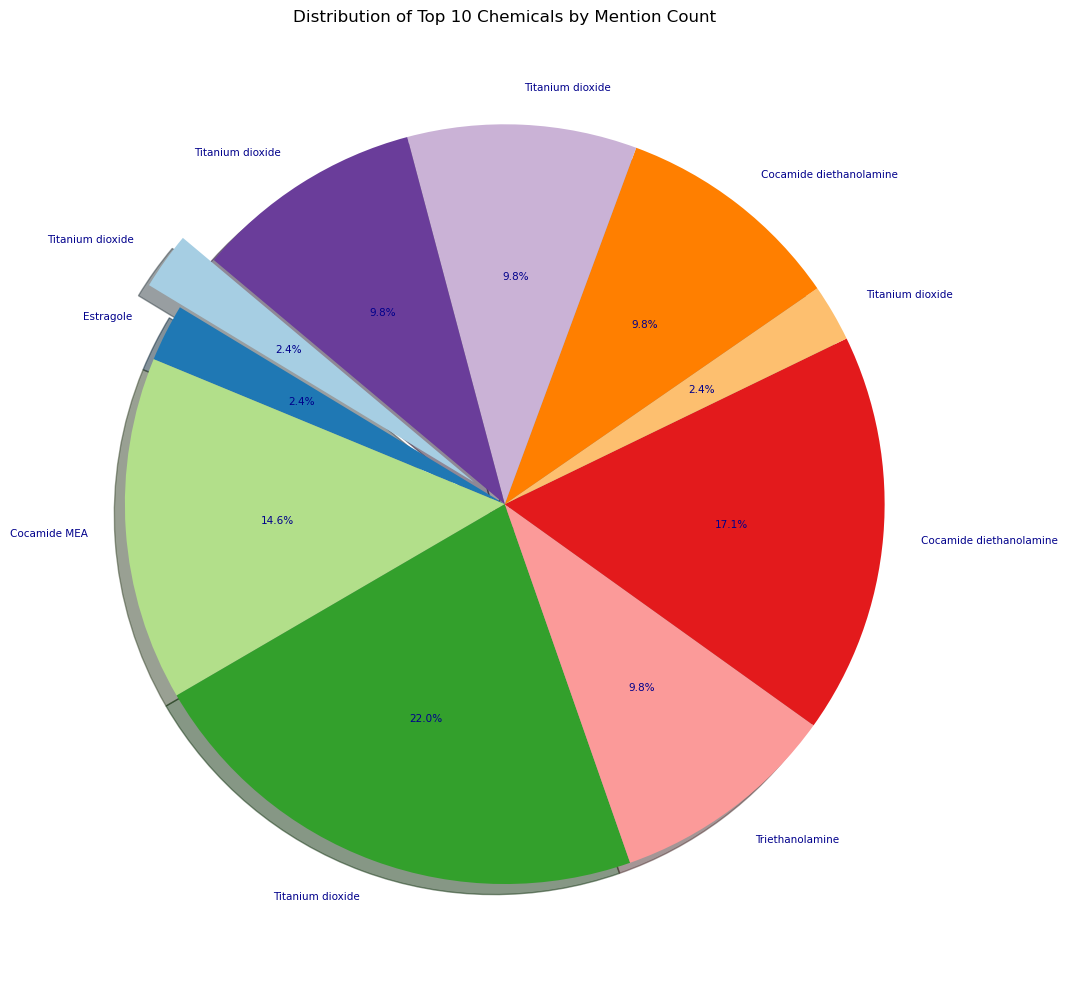

In [66]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
chemical_names = data_visualiation["ChemicalName"]
chemical_counts = data_visualiation["ChemicalCount"]
top_chemicals = chemical_names[:10]  # Top 10 chemicals
top_chemical_counts = chemical_counts[:10]  # Counts for top 10

plt.figure(figsize=(12, 10))
plt.pie(top_chemical_counts, labels=top_chemicals, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, explode=explode, shadow=True, textprops={'fontsize': 7.5, 'color': 'darkblue'})
plt.title('Distribution of Top 10 Chemicals by Mention Count')
plt.tight_layout()
plt.savefig("MA graphs\MA_graphs3.png")
plt.size = "equal"
plt.show()

## Chemicals in baby products

In [67]:
original_new_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


In [68]:
baby_products = original_new_df.loc[original_new_df["PrimaryCategory"]=="Baby Products"]
baby_products.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
6604,BubbleGum Bubbles No Tears Shampoo,NaN,"Farouk Systems, Inc.",BioSilk,Baby Products,0,0,Trade Secret,2009-09-30,2009-09-30,NaT,2009-09-30,2009-10-13,2009-10-13,0
12980,Jasmine Tea Shower Gel,NaN,"Buth-na-Bodhaige, Inc",The Body Shop,Baby Products,68603-42-9,5136,Cocamide diethanolamine,2009-10-09,2011-02-11,2011-02-11,2009-10-09,2009-10-09,NaT,1
12981,Nectarine & Plum Bath & Shower Gel,NaN,"Buth-na-Bodhaige, Inc",The Body Shop,Baby Products,68603-42-9,5139,Cocamide diethanolamine,2009-10-09,2011-02-11,2011-02-11,2009-10-09,2009-10-09,NaT,1
14178,Baby Don't Cry Shampoo,Fragrance/parfum,John Paul Mitchell Systems,John Paul Mitchell Systems,Baby Products,100-42-5,5734,Styrene,2009-10-09,2010-12-30,NaT,2009-10-09,2009-10-09,NaT,1
15001,Nature's Gate Organics Baby Soothing Diaper Ra...,NaN,LEVLAD LLC,Nature's Gate,Baby Products,79-81-2,6155,"Retinol/retinyl esters, when in daily dosages ...",2009-10-12,2019-06-27,2009-05-31,2009-10-12,2009-10-12,NaT,1


In [69]:
baby_products_df = baby_products[["CompanyName", "PrimaryCategory", "ChemicalName","DiscontinuedDate", "ChemicalDateRemoved", "ChemicalCount"]]
baby_products_df.head()

,CompanyName,PrimaryCategory,ChemicalName,DiscontinuedDate,ChemicalDateRemoved,ChemicalCount
6604,"Farouk Systems, Inc.",Baby Products,Trade Secret,NaT,2009-10-13,0
12980,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,2011-02-11,NaT,1
12981,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,2011-02-11,NaT,1
14178,John Paul Mitchell Systems,Baby Products,Styrene,NaT,NaT,1
15001,LEVLAD LLC,Baby Products,"Retinol/retinyl esters, when in daily dosages ...",2009-05-31,NaT,1


In [70]:
baby_products_df.shape

(47, 6)

In [71]:
baby_products_df['ChemicalName'] = baby_products_df['ChemicalName'].replace({
    "Cadmium and cadmium compounds" : "Cadmium", 
    "Silica, crystalline (airborne particles of respirable size)" : "Silica", 
    "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents." : "Daily dosages of Retinol/retinyl esters"})
baby_products_df.head(90)

,CompanyName,PrimaryCategory,ChemicalName,DiscontinuedDate,ChemicalDateRemoved,ChemicalCount
6604,"Farouk Systems, Inc.",Baby Products,Trade Secret,NaT,2009-10-13,0
12980,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,2011-02-11,NaT,1
12981,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,2011-02-11,NaT,1
14178,John Paul Mitchell Systems,Baby Products,Styrene,NaT,NaT,1
15001,LEVLAD LLC,Baby Products,Daily dosages of Retinol/retinyl esters,2009-05-31,NaT,1
19139,Harmon Stores Inc.,Baby Products,Cadmium,NaT,NaT,2
19140,Harmon Stores Inc.,Baby Products,Lead,NaT,NaT,2
20078,"Chattem, Inc.",Baby Products,Daily dosages of Retinol/retinyl esters,NaT,NaT,1
20083,"Chattem, Inc.",Baby Products,Daily dosages of Retinol/retinyl esters,NaT,NaT,1
20217,Expanscience Laboratoires,Baby Products,Titanium dioxide,2017-03-15,NaT,1


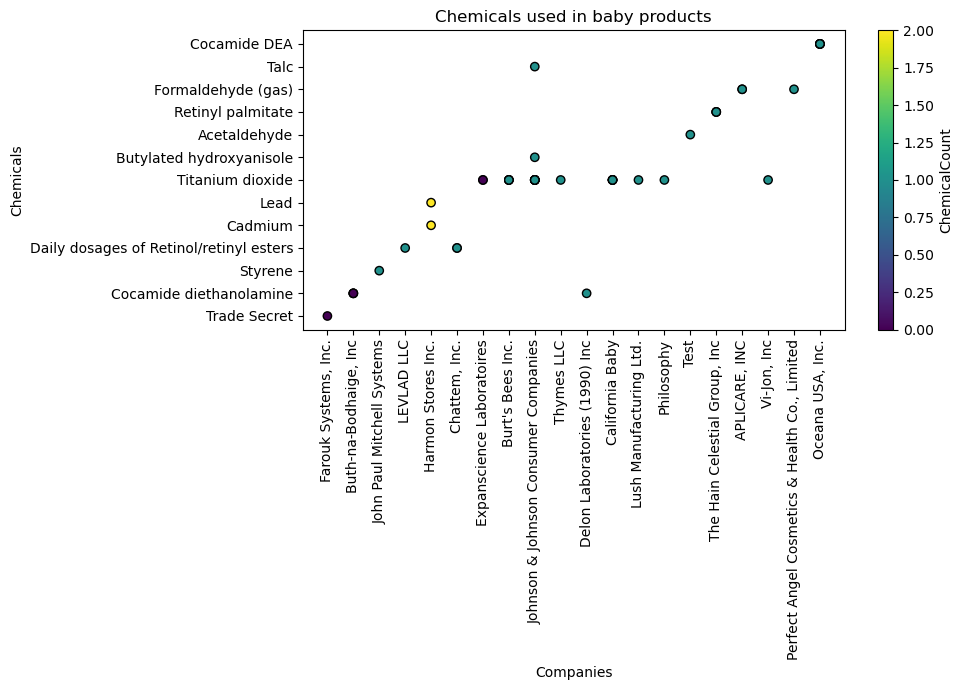

In [75]:
plt.figure(figsize=(10,7))
plt.scatter(baby_products_df["CompanyName"], baby_products_df["ChemicalName"], c=baby_products_df["ChemicalCount"], facecolors="red", edgecolors="black")

plt.xticks(rotation=90)
plt.xlabel("Companies")
plt.ylabel("Chemicals")
plt.title("Chemicals used in baby products")
clb = plt.colorbar()
clb.set_label("ChemicalCount")
plt.tight_layout()
plt.savefig("MA graphs\MA_graphs4.png")
plt.show()


In [327]:
number_of_baby_products = len(baby_products_df)
number_of_baby_products

47